In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

figpath = '../figures/'

# Ejemplos de la ley de los grandes números

In [8]:
N = 10_000
n = np.arange(1, N+1)

def plot_convergence(ax, dist, loc, *, seed=123456, title=''):
    np.random.seed(seed)
    x = dist.rvs(loc, size=N)
    promedios = x.cumsum() / n
    
    mu = dist.stats(loc)[0]
    
    ax.axhline(0, color='white', lw=2)
    ax.plot(n, promedios - (loc if np.isnan(mu) else mu))
    ax.set_title(title)
    #ax.set_xlabel('Tamaño de muestra')

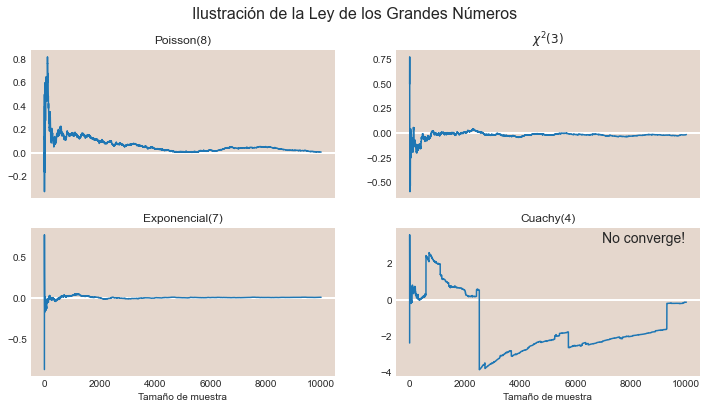

In [14]:
fig, axs = plt.subplots(2,2, figsize=(12,6), sharex=True)

plot_convergence(axs[0,0], stats.poisson, 8, title='Poisson(8)')
plot_convergence(axs[0,1], stats.chi2, 3, title='$\chi^2(3)$')
plot_convergence(axs[1,0], stats.expon, 7, title='Exponencial(7)')
plot_convergence(axs[1,1], stats.cauchy, 4, title='Cuachy(4)')

for ax in axs[1]:
    ax.set_xlabel('Tamaño de muestra')
    

for ax in axs.flatten():
    ax.set_facecolor("#E5D7CD")

ax.annotate('No converge!', (0.95,0.9), xycoords='axes fraction', ha='right', fontsize=14)
    
fig.suptitle('Ilustración de la Ley de los Grandes Números', fontsize=16)
fig.savefig(figpath+'LNN.pdf', bbox_inches='tight', facecolor="#FFF2E5")